In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

india_exports = pd.read_csv('Data/2018-2010_export.csv')
india_imports = pd.read_csv('Data/2018-2010_import.csv')
india_exports.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [102]:
india_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [103]:
india_imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [104]:
india_exports.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


In [105]:
india_imports.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


#### Export and Import value from 2010-2018

Total exports from 2010-2018: $2,652,519.47 Million
Total imports from 2010-2018: $5,004,202.2700000005 Million


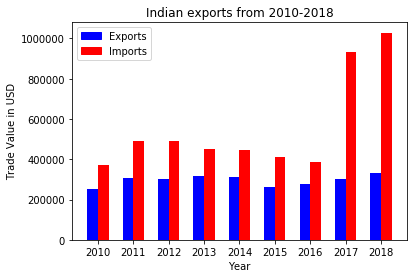

In [106]:
exports_value = "{:,}".format(india_exports['value'].sum())
imports_value = "{:,}".format(india_imports['value'].sum())
print('Total exports from 2010-2018: ${0} Million'.format(exports_value))
print('Total imports from 2010-2018: ${0} Million'.format(imports_value))

df_exportsByYear = india_exports.groupby(['year']).agg({'value':'sum'})
df_importsByYear = india_imports.groupby(['year']).agg({'value':'sum'})
bar_width = 0.3
plt.bar(df_exportsByYear.index,df_exportsByYear.value, width=bar_width, color='blue')
plt.bar(df_importsByYear.index+bar_width,df_importsByYear.value, width=bar_width, color='red')
plt.xlabel('Year')
plt.ylabel('Trade Value in USD')
plt.xticks(df_importsByYear.index + bar_width/2, df_importsByYear.index)
plt.title('Indian exports from 2010-2018')
blue_patch = ptc.Patch(color='blue', label='Exports')
red_patch = ptc.Patch(color='red', label='Imports')
plt.legend(handles=[blue_patch,red_patch])
plt.show()

#### Top 10 Largely exported and imported commodity

In [107]:
# this line returns series with commodity and Hscode column in descending order, where we can see which commodity
# is listed in the data most frequently which will be most exported commodity
# for exports
large_exports = india_exports.groupby(['Commodity','HSCode']).size().sort_values(ascending=False)
# convert into dataframe
df1 = large_exports.to_frame()
df1 = df1.rename(columns = {0:'Count'})
df1.head(n=10)

# for imports
large_imports = india_imports.groupby(['Commodity','HSCode']).size().sort_values(ascending=False)
df2 = large_imports.to_frame()
df2 = df2.rename(columns = {0:'Count'})
df2.head(n=10)

,,Count
Commodity,HSCode,
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",85,2174
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",84,2090
PLASTIC AND ARTICLES THEREOF.,39,1866
MISCELLANEOUS GOODS.,99,1836
IRON AND STEEL,72,1826
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",90,1739
ALUMINIUM AND ARTICLES THEREOF.,76,1729
ARTICLES OF IRON OR STEEL,73,1619
COPPER AND ARTICLES THEREOF.,74,1518


#### Visualizing import and export commodity with highest value from 2010-2018

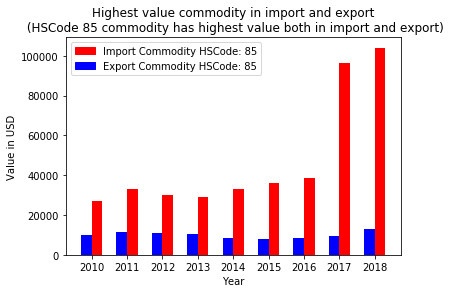

In [108]:
filter_export = india_exports['HSCode']==85
export_commodity = india_exports[filter_export].groupby(['year']).agg({'value':'sum'})
filter_import = india_imports['HSCode'] == 85
import_commodity = india_imports[filter_import].groupby(['year']).agg({'value':'sum'})

plt.bar(export_commodity.index, export_commodity.value, width=bar_width, color='blue')
plt.bar(import_commodity.index+bar_width, import_commodity.value, width=bar_width, color='red')
plt.xlabel('Year')
plt.ylabel('Value in USD')
plt.title('Highest value commodity in import and export\n (HSCode 85 commodity has highest value both in import and export)')
plt.xticks(import_commodity.index+bar_width/2, import_commodity.index)
blue_patch = ptc.Patch(color='blue', label='Export Commodity HSCode: 85')
red_patch = ptc.Patch(color='red', label='Import Commodity HSCode: 85')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

#### Lowest and Highest import/export in any year

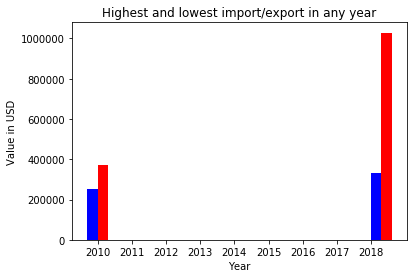

In [109]:
# Lowest import and export in any year
low_exp_filter = df_exportsByYear['value']==df_exportsByYear.value.min()
low_imp_filter = df_importsByYear['value']==df_importsByYear.value.min()
low_exp = df_exportsByYear[low_exp_filter]
low_imp = df_importsByYear[low_imp_filter]

# highest import and export in any year
high_imp_filter = df_importsByYear['value']==df_importsByYear.value.max()
high_exp_filter = df_exportsByYear['value']==df_exportsByYear.value.max()
high_imp = df_importsByYear[high_imp_filter]
high_exp = df_exportsByYear[high_exp_filter]

ticks = ['2010','2018']
plt.bar(low_exp.index, low_exp.value, width=bar_width, color='blue')
plt.bar(low_imp.index+bar_width, low_imp.value, width=bar_width, color='red')
plt.bar(high_exp.index+bar_width, high_exp.value, width=bar_width, color='blue')
plt.bar(high_imp.index+bar_width+bar_width, high_imp.value, width=bar_width, color='red')
plt.xlabel('Year')
plt.ylabel('Value in USD')
plt.xticks(df_importsByYear.index+bar_width/2, df_importsByYear.index)
plt.title('Highest and lowest import/export in any year')
plt.show()

#### Top 5 countries with highest export and import value from 2010-2018

In [110]:
df_highest_exports_to = india_exports.groupby('country').agg({'value':'sum'}).sort_values(by='value',ascending=False)
df_highest_imports_to = india_imports.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending=False)
df_highest_exports_to

,value
country,
U S A,360609.57
U ARAB EMTS,289374.88
CHINA P RP,121806.00
HONG KONG,115693.35
SINGAPORE,101679.70
U K,79942.61
GERMANY,68855.45
NETHERLAND,66581.17
SAUDI ARAB,65995.99


#### Highest Trade Deficit with a country

In [111]:
df_import_countries = df_highest_imports_to.sort_values(by='country', ascending = False)
df_export_countries = df_highest_exports_to.sort_values(by='country', ascending = False)
df_countries_trade_balance = pd.DataFrame([df_export_countries.index, df_export_countries.value-df_import_countries.value]).transpose()
df_countries_trade_balance.columns=['Country', 'Trade_Balance']
surplus_countries = df_countries_trade_balance[df_countries_trade_balance['Trade_Balance'] >= 0].sort_values(by='Trade_Balance', ascending=False)
deficit_countries = df_countries_trade_balance[df_countries_trade_balance['Trade_Balance'] < 0].sort_values(by='Trade_Balance')

# Top 5 trade surplus countries
surplus_countries.head()
# Top 5 trade deficit countries
deficit_countries.head()

,Country,Trade_Balance
44,ST HELENA,-557071
213,C AFRI REP,-233747
188,DENMARK,-226108
103,MONGOLIA,-172631
100,MOROCCO,-118304


#### Top 5 Trade deficit countries

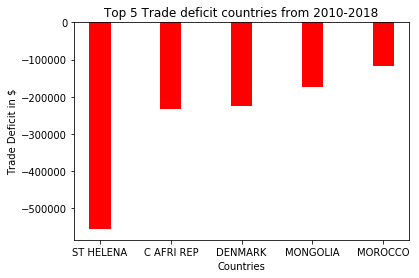

In [112]:
def_cont = deficit_countries.head()
plt.bar(def_cont.Country, def_cont.Trade_Balance, width=bar_width, color='red')
plt.xlabel('Countries')
plt.ylabel('Trade Deficit in $')
plt.title('Top 5 Trade deficit countries from 2010-2018')
plt.show()

#### Top 5 trade surplus countries

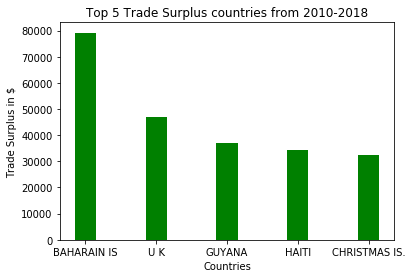

In [113]:
sur_cont = surplus_countries.head()
plt.bar(sur_cont.Country, sur_cont.Trade_Balance, width=bar_width, color='green')
plt.xlabel('Countries')
plt.ylabel('Trade Surplus in $')
plt.title('Top 5 Trade Surplus countries from 2010-2018')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

#### Trade Deficit from 2010-2018

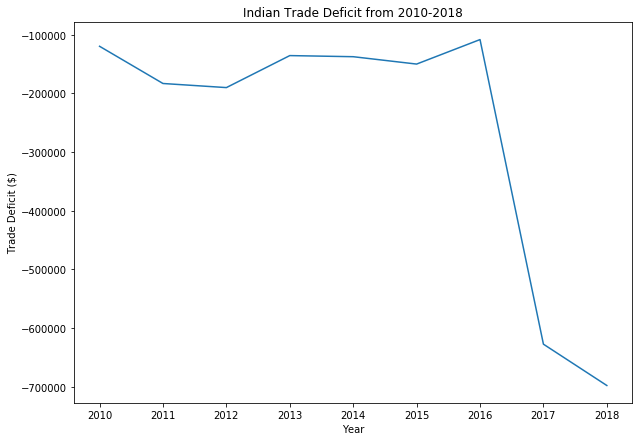

In [114]:
df_yearly_trade_balance = pd.DataFrame([df_exportsByYear.index, df_exportsByYear.value-df_importsByYear.value]).transpose()
df_yearly_trade_balance.columns = ['Year','Trade_Balance']

plt.plot(df_yearly_trade_balance.Year, df_yearly_trade_balance.Trade_Balance)
plt.xlabel('Year')
plt.ylabel('Trade Deficit ($)')
plt.title('Indian Trade Deficit from 2010-2018')
plt.rcParams['figure.figsize'] = (8,5)
plt.show()